<a href="https://colab.research.google.com/github/syoshio/openbr/blob/master/DIO_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow


(36, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   varI    36 non-null     int64  
 1   varD    36 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 704.0 bytes
None
             varI          varD
count   36.000000  3.600000e+01
mean   175.000000 -1.233581e-17
std    105.356538  7.172348e-01
min      0.000000 -1.000000e+00
25%     87.500000 -6.737500e-01
50%    175.000000  0.000000e+00
75%    262.500000  6.737500e-01
max    350.000000  1.000000e+00
Index(['varI', 'varD'], dtype='object')
          varI      varD
varI  1.000000 -0.778043
varD -0.778043  1.000000


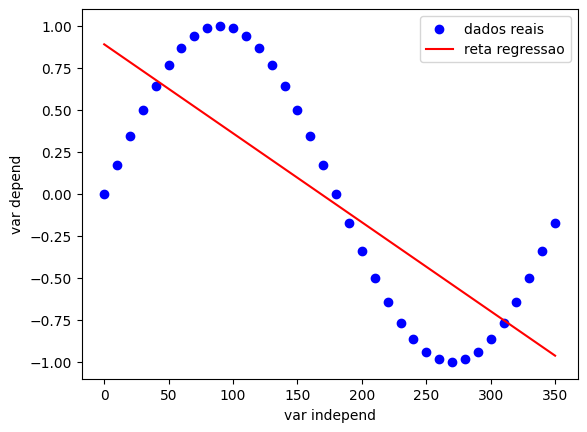

coeficiente R2:  0.54
0.8904913358760649
[-0.00529524]
var_previsao : [0.89049134]


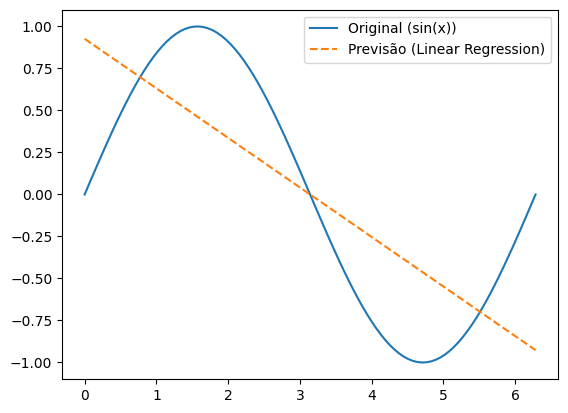

FileNotFoundError: [Errno 2] No such file or directory: 'D:/projetos/dsa/pythonProject1/arquivos/tstDados.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df = pd.read_csv("tstDados.csv", delimiter=";")

print(df.shape)
print(df.info())
print(df.describe())
print(df.columns)
print(df.corr(method="pearson"))

X = np.array(df["varI"])
X = X.reshape(-1,1)

Y = df["varD"]

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.2, random_state=42)

modelo = LinearRegression()

modelo.fit(X_treino, Y_treino)

plt.scatter(X,Y, color="blue",label="dados reais")
plt.plot(X, modelo.predict(X), color="red", label="reta regressao")
plt.xlabel("var independ")
plt.ylabel("var depend")
plt.legend()
plt.show()

score = modelo.score(X_teste, Y_teste)
print(f"coeficiente R2: {score: .2f}")

print(modelo.intercept_)
print(modelo.coef_)

var_independente = np.array([[0]])

var_independente = var_independente.reshape(-1,1)

var_previsao = modelo.predict(var_independente)

print("var_previsao :", var_previsao)





# Passo 1: Gerar os dados
# Criar valores de x entre 0 e 2*pi
x = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y = np.sin(x)

# Passo 2: Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(x, y)

# Passo 3: Fazer previsões
# Prever os valores de y para os valores de x usados
y_pred = model.predict(x)

# Visualizar os resultados
plt.plot(x, y, label='Original (sin(x))')
plt.plot(x, y_pred, label='Previsão (Linear Regression)', linestyle='--')
plt.legend()
plt.show()







from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Carregando os dados
df = pd.read_csv("D:/projetos/dsa/pythonProject1/arquivos/tstDados.csv", delimiter=";")

# Explorando os dados
print(df.shape)
print(df.info())
print(df.describe())
print(df.columns)
print(df.corr(method="pearson"))

# Preparando os dados para o modelo
X = df["varI"].values.reshape(-1, 1)  # Certificando-se de que X seja 2D
Y = df["varD"].values

# Criando os termos polinomiais
poly = PolynomialFeatures(degree=4)  # Use um grau adequado para capturar a não linearidade
X_poly = poly.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste
X_treino_poly, X_teste_poly, Y_treino_poly, Y_teste_poly = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# 1. Treinando o modelo de regressão linear nos termos polinomiais
modelo_poly = LinearRegression()
modelo_poly.fit(X_treino_poly, Y_treino_poly)

# 2. Support Vector Regression (SVR)
modelo_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
modelo_svr.fit(X_treino_poly, Y_treino_poly)

# 3. Redes Neurais
modelo_nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=10000, random_state=42)
modelo_nn.fit(X_treino_poly, Y_treino_poly)

# 4. Árvores de Decisão
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_treino_poly, Y_treino_poly)

# 5. Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_treino_poly, Y_treino_poly)



# Gerando uma faixa de valores de X para a curva polinomial
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# Plotando os dados reais e a curva de regressão
plt.scatter(X_treino_poly[:, 1], Y_treino_poly, color="blue", label="Dados de treino")
plt.scatter(X_teste_poly[:, 1], Y_teste_poly, color="green", label="Dados de teste")

plt.plot(X_range, modelo_poly.predict(X_range_poly), color="red", label="Curva de Regressão Polinomial")
plt.plot(X_range, modelo_svr.predict(X_range_poly), color="green", label="SVR")
#plt.plot(X_range, modelo_nn.predict(X_range_poly), color="purple", label="Redes Neurais")
plt.plot(X_range, modelo_tree.predict(X_range_poly), color="orange", label="Árvore de Decisão")
plt.plot(X_range, modelo_rf.predict(X_range_poly), color="brown", label="Random Forest")

plt.xlabel("Variável Independente")
plt.ylabel("Variável Dependente")
plt.legend()
plt.show()

# Avaliando o modelo
score = modelo_poly.score(X_teste_poly, Y_teste_poly)
print(f"Coeficiente R²: {score:.2f}")

# Fazendo uma previsão para um valor específico
var_independente = np.array([[0]])  # Mantendo como 2D
var_independente_poly = poly.transform(var_independente)

var_previsao = modelo_poly.predict(var_independente_poly)

print("Previsão para var_independente = 0:", var_previsao)

In [4]:
pip install pandas
